In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline




# Генерируем данные с двумя признаками, образующими три различимые области
np.random.seed(0)


# Генерируем точки для трех областей
data1 = np.random.rand(100, 2) * 0.4
data2 = np.random.rand(100, 2) * 0.4 + np.array([0.7, 0.4])
data3 = np.random.rand(100, 2) * 0.4 + np.array([0.2, 0.6])

data = np.vstack((data1, data2, data3))

df = pd.DataFrame(data, columns=['Время обращения', 'Неполадки'])

df['Цвет'] = 'b'

df.head()

,Время обращения,Неполадки,Цвет
0,0.219525,0.286076,b
1,0.241105,0.217953,b
2,0.169462,0.258358,b
3,0.175035,0.356709,b
4,0.385465,0.153377,b


<Axes: xlabel='Время обращения', ylabel='Неполадки'>

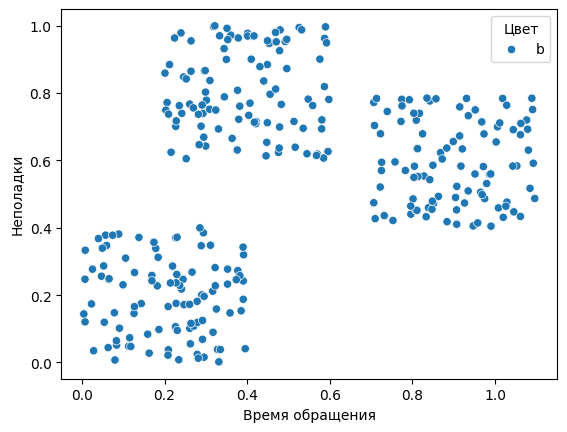

In [2]:
sns.scatterplot(data=df, x='Время обращения', y='Неполадки', hue='Цвет', markers='o')

In [3]:
x = df.iloc[:10, :2]
x

,Время обращения,Неполадки
0,0.219525,0.286076
1,0.241105,0.217953
2,0.169462,0.258358
3,0.175035,0.356709
4,0.385465,0.153377
5,0.316690,0.211558
6,0.227218,0.370239
7,0.028414,0.034852
8,0.008087,0.333048
9,0.311263,0.348005


In [4]:
k = 3

x = x.values

In [5]:
np.random.seed(1)

idx = np.random.choice(x.shape[0], k, replace=False)

centroids = x[idx, :]

centroids

array([[0.16946192, 0.25835765],
       [0.3112627 , 0.34800486],
       [0.22721782, 0.37023866]])

In [6]:
from scipy.spatial.distance import cdist

distances = cdist(x, centroids, 'euclidean')
distances

array([[0.05722452, 0.110684  , 0.08451372],
       [0.08225141, 0.14776829, 0.1529173 ],
       [0.        , 0.16776199, 0.12590911],
       [0.09850932, 0.13650562, 0.05390831],
       [0.24016327, 0.20829343, 0.26846108],
       [0.15448729, 0.13655479, 0.18216705],
       [0.12590911, 0.08693608, 0.        ],
       [0.26429017, 0.42198109, 0.38988099],
       [0.17782123, 0.30354406, 0.22226406],
       [0.16776199, 0.        , 0.08693608]])

In [7]:
points = distances.argmin(1)

new_centroids = []

for i in range(k):
  pts = x[points == i]
  new_centroids.append(pts.mean(axis=0))

new_centroids

[array([0.13331889, 0.22605726]),
 array([0.33780594, 0.23764648]),
 array([0.20112635, 0.36347393])]

In [8]:
new_centroids = np.vstack(new_centroids)


In [9]:
tol = 0.1

stop_criteria = False

while not stop_criteria:
  distances = cdist(x, centroids, 'euclidean')
  points = distances.argmin(1)

  new_centroids = []
  for i in range(k):
    pts = x[points == i]
    new_centroids.append(pts.mean(axis=0))

  old_centroids = centroids.copy()
  centroids = np.vstack(new_centroids)
  stop_criteria = (np.abs(old_centroids - centroids) > tol).sum() == 0

points

array([2, 1, 0, 2, 1, 1, 2, 0, 0, 2])

In [11]:
class MyKMeans(object):
  def __init__(self, k, tol=0.1):
    self.k = k
    self.tol = tol
    self.centroids = None

  def fit(self, x):
    idx = np.random.choice(x.shape[0], self.k, replace=False)
    centroids = x[idx, :]
    stop_criteria = False

    while not stop_criteria:
      distances = cdist(x, centroids, 'euclidean')
      points = distances.argmin(1)

      new_centroids = []

      for i in range(self.k):
        pts = x[points == i]
        new_centroids.append(pts.mean(axis=0))

      old_centroids = centroids.copy()
      centroids = np.vstack(new_centroids)
      stop_criteria = (np.abs(old_centroids - centroids) > self.tol).sum() == 0
    self.centroids = centroids

    return self

  def predict(self, x):
    distances = cdist(x, self.centroids, 'euclidean')
    points = distances.argmin(1)
    return points


In [12]:
x = df.iloc[:, :2].values
km = MyKMeans(k=3).fit(x)

point = km.predict(x)

In [13]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=3)
#Теперь запустим алгоритм19
x = df.iloc[:, :2]
km.fit(x)
points = km.predict(x)

<Axes: xlabel='Время обращения', ylabel='Неполадки'>

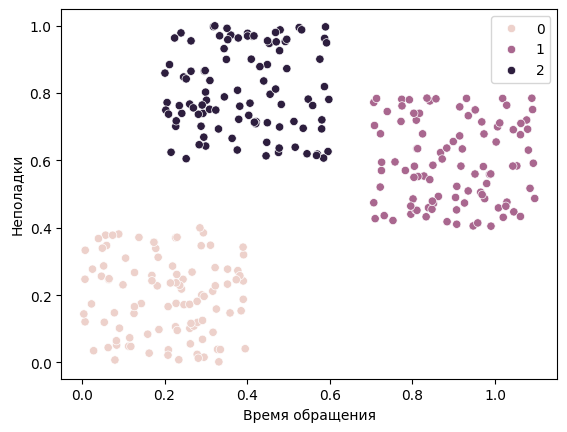

In [18]:
sns.scatterplot(data=df, x='Время обращения', y='Неполадки', hue=points)

In [20]:
n_clusters = list(range(2, 7))
metrics = []
for k in n_clusters:
    km = KMeans(n_clusters=k).fit(x)  

In [23]:
metrics.append(km.inertia_)
#Построим график зависимости величины инерции от количества кластеров
sns.lineplot(n_clusters, metrics)

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given